# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Note: Since the codes in this and the next section came with the default homework files, no change has been done.
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Note: Since the codes in this and the next section came with the default homework files, no change has been done.
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#entering url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Producing lists for different API parameters 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# setting counter 
record = 1

#printing statement
print(f"Beginning Data Retrieval | Cities")
print(f"---------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record}      | {city_record}")
       
        
        # Increasing the counter 
        record= record + 1
           
    # if there is no record, "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval | Cities
---------------------------------
Processing Record 1      | Half Moon Bay
Processing Record 2      | Sabang
Processing Record 3      | La Macarena
Processing Record 4      | Toora-Khem
Processing Record 5      | Kapaa
Processing Record 6      | Castro
Processing Record 7      | Caniço
City not found. Skipping...
Processing Record 8      | Vilyuysk
Processing Record 9      | Busselton
Processing Record 10      | Provideniya
Processing Record 11      | San Quintín
Processing Record 12      | Albany
City not found. Skipping...
Processing Record 13      | Clyde River
Processing Record 14      | Broken Hill
Processing Record 15      | Cape Town
Processing Record 16      | Faya
Processing Record 17      | Rockhampton
City not found. Skipping...
Processing Record 18      | Belaya Gora
Processing Record 19      | Constitución
Processing Record 20      | Punta Arenas
Processing Record 21      | Pangnirtung
Processing Record 22      | Bengkulu
Processing Record

Processing Record 198      | Umluj
Processing Record 199      | Vargem Alta
Processing Record 200      | Naze
Processing Record 201      | Husavik
Processing Record 202      | Sierra Vista
Processing Record 203      | Sabha
Processing Record 204      | Nadym
Processing Record 205      | Cherskiy
City not found. Skipping...
Processing Record 206      | Båtsfjord
City not found. Skipping...
Processing Record 207      | Lima
Processing Record 208      | Mae Tha
Processing Record 209      | Hobyo
Processing Record 210      | Korla
City not found. Skipping...
City not found. Skipping...
Processing Record 211      | Kavieng
Processing Record 212      | Ciudad Bolivar
Processing Record 213      | Hasaki
Processing Record 214      | Port Macquarie
Processing Record 215      | Saint Charles
Processing Record 216      | Porto-Novo
Processing Record 217      | Harper
Processing Record 218      | Cam Ranh
City not found. Skipping...
Processing Record 219      | Minna
Processing Record 220      | L

City not found. Skipping...
Processing Record 402      | Ixtapa
Processing Record 403      | Rio Grande
Processing Record 404      | Yulara
Processing Record 405      | Narsaq
Processing Record 406      | Şabyā
Processing Record 407      | Souillac
Processing Record 408      | Manavālakurichi
Processing Record 409      | Mana
Processing Record 410      | Statesville
Processing Record 411      | Baiyin
Processing Record 412      | Grootfontein
Processing Record 413      | Fairbanks
Processing Record 414      | Ola
Processing Record 415      | São Gabriel da Cachoeira
Processing Record 416      | Russell
Processing Record 417      | Rioblanco
Processing Record 418      | Peniche
Processing Record 419      | Kibala
Processing Record 420      | Dandong
Processing Record 421      | Tibati
Processing Record 422      | Barvinkove
Processing Record 423      | Kloulklubed
Processing Record 424      | Rehoboth
Processing Record 425      | Gerāsh
Processing Record 426      | Payo
Processing Recor

In [5]:
#creating a dictionary a dictonary with the lists generated
weather_conditions = {
    "City Name": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":lat, 
    "Longitude":lng, 
    "Max Temp.": max_temp,
    "Wind Speed":wind_speed
}

# establishing a dataframe including the above elements
weather_elements = pd.DataFrame(weather_conditions)

# displaying the dataframe 
weather_elements.count()

City Name     583
Cloudiness    583
Country       583
Date          583
Humidity      583
Latitude      583
Longitude     583
Max Temp.     583
Wind Speed    583
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#saving data to a CSV file
weather_elements.to_csv("output_data/cities.csv")

# displaying data frame 
weather_elements.head()



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp.,Wind Speed
0,Carnarvon,0,AU,1590698845,65,-24.87,113.63,63.45,9.91
1,Qaanaaq,78,GL,1590698845,92,77.48,-69.36,32.32,1.45
2,The Valley,99,AI,1590698846,78,18.22,-63.06,82.99,4.00
3,Ushuaia,100,AR,1590698805,56,-54.80,-68.30,41.00,11.41
4,Tessalit,74,ML,1590698846,28,20.20,1.01,87.64,3.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

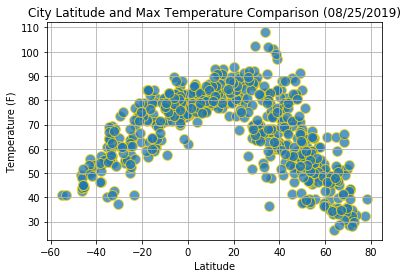

In [7]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Max Temp."], marker="o", s=100, alpha = 0.75, edgecolor = "gold")

#locating the graph properties
plt.title("City Latitude and Max Temperature Comparison (08/25/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Temperature Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Humidity Plot

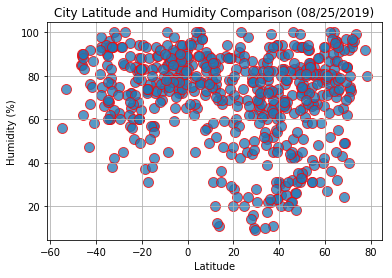

In [8]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Humidity"], marker="o", s=100, alpha = 0.75, edgecolor = "red")

#locating the graph properties
plt.title("City Latitude and Humidity Comparison (08/25/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Humidity Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Cloudiness Plot

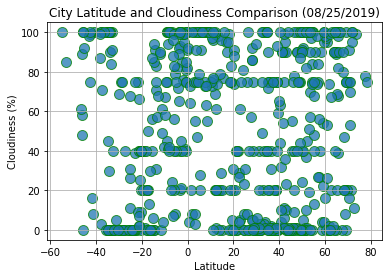

In [9]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Cloudiness"], marker="o", s=100, alpha = 0.75, edgecolor = "green")

#locating the graph properties
plt.title("City Latitude and Cloudiness Comparison (08/25/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Wind Speed Plot

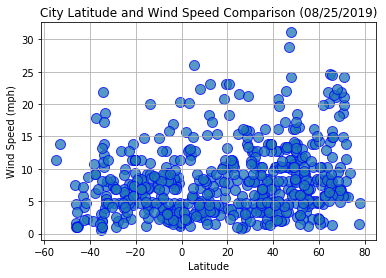

In [10]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Wind Speed"], marker="o", s=100, alpha = 0.75, edgecolor = "blue")

#locating the graph properties
plt.title("City Latitude and Wind Speed Comparison (08/25/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Winds Speed Plot.png")

#displaying the plot
plt.show()

THREE OBSERVABLE TRENDS 

The latitude vs. temperature plot tells us that, the max. temps increase from the poles towards the Equator in both North and South Hemisphere. This is called "Latitude Effect" in Geography (By the way, the cities in Southern Hemisphere have negative latitude numbers while the Northerners have positive). However, temperatures make a peak at around 20 degrees North latitude, not exactly at the equator line. This can be explained due to the different cooling and warming features of oceans and lands. Moreover, lands cover more areas in Nortern Hemisphere compared to the Southern one. Lands have low specific heat causing the existence more max. temps in the Northern Hemisphere.

It seems that there is no strong correlation between latitude and humidity. The related plot shows a great variety of values at the same or similar latitudes. However, the humidity rates are slightly  more in Norhern Hemisphere compared to the Southern Hemisphere. It can be explained by the existance of more cities in the Northern Hemisphere because the Northern Hemisphere one has more lands then the South Hemisphere.

Wind speed appears to vary between roughly 0-10 mph and has a tendency of slightly increasing from the equator towards the poles.
